<a href="https://colab.research.google.com/github/Doryane/Web-Scrapping-Archive-of-our-own-AO3-/blob/main/Web_Scrapping_AO3_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
start_time = time.time()
#main()

Web Scripping pour AO3 based on following code :
https://github.com/kenalba/ao3-scraper/blob/main/scraper.py

So the first code is a detail list of how to append the data, it's quite long and not optimize.
The idea here is if you just want to append some data (like only the date and the ID) you can shape it as you want.



---

# What this code do ?

With this code you can append the following information from AO3 and put it into a data frame from a certain page to another

*  Story IDS of the work
*  Updated date of the work
*  Title and author of the work
*  Language of the work
*  Number of words in the work
*  Number of chapter in the work
*  Number of hits 
*  Requiered tags 
*  Additionnal tags

At the end of the code, you can find some graph and histogram on time and published work.

Then you'll have a section on how to find a tag in works if needed.



---
# How to use the code ?

**Step 1 : Set the parameters**

You want to append the data from wich page to wich page and from wich fandom.

If you want to append a lot of data use the **SAME interval** of page from one to another. It's for part 3.

**Step 2 : Verify the library**

Check if every package is download.

**Step 3 : Run the code multiple time with different parameter**

If you want to download multiple page of data work from AO3 *you can't do it in one time*.

Once you've done this step you must have a bunch of file called *per example* "base_page_0_to_31","base_page_30_to_61",..."base_page_90_to_121".

Use the part 3 code to mash up every base and you got a unique database of all the work you wanted from AO3.



---
# ⚠ WARNING ⚠
Two important thing to understand when you download **many files** of data :


1.   **You can't append more than 70 pages in one time**

  If you want to append a lot of data I suggest 50 page by 50 page. I mean if you want to try to append more that's your choice but the code is optimized to append 50 by 50 (or less).

  Also, one page is 20 work, so each time you run the code you can append at max 1400 works.

2.   **You need to have the SAME interval of page between files**

  Per example, you want to append the work from a ertain fandom, you have 457 pages in total. I would suggest to append page 1 to 50 (base_page_0_to_51), then 50 to 100 (base_page_50_to_101), ... , then 400 to 450 (base_page_400_to_450 and finally page 450 to 456 (base_page_450_to_457).

  For the last one you input 456 as Number_page but its append untill page 457 because my code is WEIRD.




**Sumary :**

I. Initialization 
  1. Library
  2. Parameters
  3. Download and Soupify
  4. The directory_urls

II. Data to append
  1. Story IDS
  2. Data updated
  3. Title and author of the work
  4. Language of the work
  5. Number of Words
  6. Number of Chapters
  7. Number of hits
  8. Requiered Tags
  9. Additionnal Tags

III. The Data Frame
  1. Inside a Data Frame
  2. Basic graph and histogram
  3. Find tags in works
  4. Download a DataFrame


# Initialization

**Library**

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import csv
from time import sleep
import pickle
from os import path
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from google.colab import files

# for whatever reason, ao3_api imports as AO3. Don't look at me.
# import AO3

**Parameters**

We ask you to pick an URL from a fandom, it must be on the following form : 
"https://archiveofourown.org/tags/*fandom*/"
I don't know if a other tag work like a ship or a character name but I'm not sure.
Also I tried with small fandom (less than 20 work) and it bug, it's because the scrab is used with multiple pages.

We can't scrab everything, some fandom are too large so we ask you to pick a number of page for use (I need to fix this latter)

Edit : So tags do work but without filters

In [3]:
TEST_URL = "https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/"
#TEST_URL = "https://archiveofourown.org/tags/Argyle*s*Jonathan%20Byers/"
#TEST_URL = "https://archiveofourown.org/tags/Will%20Byers%20Needs%20a%20Hug/"

"""
Choose the URL from the fandom of you choice, must be like the same form as the example up there
Yes I'm a stranger things fan
Please don't judge
"""

"\nChoose the URL from the fandom of you choice, must be like the same form as the example up there\nYes I'm a stranger things fan\nPlease don't judge\n"

In [4]:
Beginning_Page = 1

"""
Beginning_Page is like the name indicate, the beginning of the page you want to append the works
By default it's one and ITS MUST BE UNDER Number_page
Otherwise I would be sad
"""

"\nBeginning_Page is like the name indicate, the beginning of the page you want to append the works\nBy default it's one and ITS MUST BE UNDER Number_page\nOtherwise I would be sad\n"

In [5]:
Number_page = 100
Number_page = Number_page + 1

"""
With the function below we can't scrab everything, so we ask you a number of page to scrab
Remember that one page is 20 works, so 5 page would be 100 works
Please verify the total number of page from the fandom, Number_page must be below the maximum of page

Also I'm adding a page because in python index starts at 0 so if you want 5 pages I'm just gonna add one more but it's still 5 pages

EDIT : This is a stupid reasoning btw but I let that slide
"""

"\nWith the function below we can't scrab everything, so we ask you a number of page to scrab\nRemember that one page is 20 works, so 5 page would be 100 works\nPlease verify the total number of page from the fandom, Number_page must be below the maximum of page\n\nAlso I'm adding a page because in python index starts at 0 so if you want 5 pages I'm just gonna add one more but it's still 5 pages\n\nEDIT : This is a stupid reasoning btw but I let that slide\n"

**Download and Soupify**

This function allow us to download the html page.
You don't have anything to do here just run the code.
Honeslty I don't get everything but it works so that's find (i guess).

In [6]:
def download_and_soupify(url, parser="html.parser"):
	"""
	Given a URL, downloads the site and turns it into beautiful soup.
	"""

	full_url = url + "works"
	response = urllib.request.urlopen(full_url)
	directory_html = response.read()
	index_soup = BeautifulSoup(directory_html, parser)

	return index_soup

In [7]:
index_soup = download_and_soupify(TEST_URL)

"""
We putting the soup inside of an object to use it later (to get the directory_urls)
"""

'\nWe putting the soup inside of an object to use it later (to get the directory_urls)\n'

**The directory_urls**

We're getting every url from every page, so a url for a page.
We are keeping every page because I'm too lazy to change the code and I still hope to find a way to scrap everything with one code, but the choose of number of page come later.
Yeah and sorry english isn't my first language, but it's not like in AO3 that means I really suck.

EDIT : I didn't find a way to scrap everything it's the same error each time "too many request" sorry

EDIT 2 : See for part 3 if you want to scrap every page

In [8]:
def get_directory_urls(url, index_soup):
	"""
	Given the base directory as soup, figure out how many pages there are,
	and return a list of the URLs of each directory page.
	"""

	page_numbers = index_soup.find_all("ol", class_="pagination actions")

	li_entries = page_numbers[0].find_all("li")

	li_texts = [number.text for number in li_entries]
	li_digits = [int(number) for number in li_texts if number.isdigit()]
	sorted_page_numbers = sorted(li_digits)

	number_of_pages = sorted_page_numbers[-1]

	url_prefix = url + "works?page="
	directory_urls = [(url_prefix + str(page_number)) for page_number in range(0, number_of_pages+1)]

	return directory_urls

In [9]:
directory_urls = get_directory_urls(TEST_URL,index_soup)
print(directory_urls)
print(len(directory_urls))

"""
So we putting the directory urls inside of an object to use it later.
We can see the lenght of directory_urls is actually the number of page the fandom contains.
Please verify is len(directory_urls) = of the number of page from the fandom you're scrapping.
"""

['https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=0', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=1', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=2', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=3', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=4', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=5', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=6', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=7', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=8', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=9', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=10', 'https://archiveofourown.org/tags/Stranger%20Things%20(TV%202016)/works?page=11', 'https://archiveofourown.

"\nSo we putting the directory urls inside of an object to use it later.\nWe can see the lenght of directory_urls is actually the number of page the fandom contains.\nPlease verify is len(directory_urls) = of the number of page from the fandom you're scrapping.\n"

# Data to append

**Story IDS**

So whatever reason you want to scrap AO3 something you'll need before anything else is the ID of the works, every work have one unique ID.
We'll check also the number of ID we got aftermath, to check if the dimension choosen in the beggining are correct.

In [10]:
def get_story_ids(directory_url):
	"""
	Given a single directory URL, get all stories from that URL. Returns a list of story IDs.
	"""

	dir_soup = download_and_soupify(directory_url)
	dir_links = dir_soup.find_all("a", href=True)

	dir_hrefs = [link.attrs['href'] for link in dir_links]
	work_hrefs = [link for link in dir_hrefs if "/works/" in link]
	potential_ids = [work.split("/")[2] for work in work_hrefs]
	id_list = [int(work_id) for work_id in potential_ids if work_id.isdigit()]

	story_ids = list(set(id_list))

	return story_ids

In [11]:
story_ids = []
for i in range(Beginning_Page,Number_page):
  print(get_story_ids(directory_urls[i]))

  story_ids.append(get_story_ids(directory_urls[i]))

"""
Btw sorry for the print but we need to check if the ID are different from row to row
"""

[44157319, 44733832, 21311245, 44511886, 43212331, 44731969, 44731972, 44719444, 44709079, 40278624, 44733922, 43918179, 44674918, 41122407, 43966569, 40441965, 44732017, 43787893, 44043262, 44690431]
[44728339, 40414356, 44729254, 44633647, 44730547, 44730424, 44385724, 39914823, 44471242, 44729293, 44730070, 44597209, 43106268, 43879902, 44201449, 44731375, 43690483, 42417525, 40012152, 44710138]
[44727187, 44653972, 44105112, 44678296, 44726296, 44567962, 44727853, 44105782, 44726455, 44728006, 41383011, 42574950, 44728426, 42423789, 42620142, 44726386, 41134326, 44727289, 44728318, 44728063]
[41164800, 44216197, 44723089, 43251858, 43957531, 44724646, 44724136, 44374447, 44667571, 44213569, 44724547, 44245705, 43583691, 44479567, 42906837, 43547607, 40622556, 44724466, 44725876, 43404024]
[43761672, 44235784, 44723212, 44713501, 44591269, 44723623, 44723116, 44722480, 43395129, 44620615, 44723530, 44721610, 39625044, 44722900, 44653402, 44700253, 44722144, 44441830, 42697584, 41058

'\nBtw sorry for the print but we need to check if the ID are different from row to row\n'

In [12]:
story_ids_2 = []
for i in range(0,len(story_ids)):
 story_ids_2 = story_ids_2 + story_ids[i]

print(story_ids_2)
len(story_ids_2)

"""
This code is just use to put every ID in the same list
Yeah I know it's quite a long code for what it do
"""

[44157319, 44733832, 21311245, 44511886, 43212331, 44731969, 44731972, 44719444, 44709079, 40278624, 44733922, 43918179, 44674918, 41122407, 43966569, 40441965, 44732017, 43787893, 44043262, 44690431, 44728339, 40414356, 44729254, 44633647, 44730547, 44730424, 44385724, 39914823, 44471242, 44729293, 44730070, 44597209, 43106268, 43879902, 44201449, 44731375, 43690483, 42417525, 40012152, 44710138, 44727187, 44653972, 44105112, 44678296, 44726296, 44567962, 44727853, 44105782, 44726455, 44728006, 41383011, 42574950, 44728426, 42423789, 42620142, 44726386, 41134326, 44727289, 44728318, 44728063, 41164800, 44216197, 44723089, 43251858, 43957531, 44724646, 44724136, 44374447, 44667571, 44213569, 44724547, 44245705, 43583691, 44479567, 42906837, 43547607, 40622556, 44724466, 44725876, 43404024, 43761672, 44235784, 44723212, 44713501, 44591269, 44723623, 44723116, 44722480, 43395129, 44620615, 44723530, 44721610, 39625044, 44722900, 44653402, 44700253, 44722144, 44441830, 42697584, 41058033,

"\nThis code is just use to put every ID in the same list\nYeah I know it's quite a long code for what it do\n"

**Date updated**

Ok so the main reason I'm doing this is to check how the add of work evolve throught time so I'm adding the datetime to it.
The function is actually made by myself so if it doesn't work you know why.

In [13]:
def datetime(directory_url):
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("p",{"class":"datetime"}):
    text=x.get_text()
    date_work.append(str(text))

    """
    I know you gonna ask me 'But Doryane, date_work isn't define that doesn't make sens' and you right, but I define it after so no worry
    Jeez my commentary are useless sorry for that
    I'm just really bored at work and taping a lot make people think I'm working hard (I'm not)
    """

In [14]:
date_work = []
for i in range(Beginning_Page,Number_page):
  date_work.append(datetime(directory_urls[i]))

print(date_work)
len(date_work)

['02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', None, '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', None, '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '01 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', None, '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Feb 2023', '02 Fe

2100

In [15]:
date_work_2 = []
for val in date_work:
    if val != None :
        date_work_2.append(val)

"""
So I'm doing the last loop because otherwise we'll have more value thant the ID.
I didn't find it in the html code but I guess there another datetime or nothing but it just add an empty value to the list.
That's why I had to drop it.

EDIT : actually there's a better way to remove the None on the list (date_work.remove(None)) but it seems to take more time than this.
"""

len(date_work_2)

2000

**Title and author of the work**

Ok so I tried to seperate it (no) but it come with one data.
So we have first the title of the work (some are really fun) and the author name (a lot are REALLY fun) it separate by "by" so if you want to make two data of it it's very simple but personnaly I'm not gonna use the title or author name later.

In [16]:
def worktitle(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("h4",attrs={"class": "heading"}):  
    text=x.get_text()
    work_title_authors.append(str(text))

  work_title_authors.remove('\n            Include\n          ')
  work_title_authors.remove('\n            Exclude\n          ')
  work_title_authors.remove('More Options')
  work_title_authors.remove('Pages Navigation')
  work_title_authors.remove('About the Archive')
  work_title_authors.remove('Pages Navigation')
  work_title_authors.remove('Contact Us')
  work_title_authors.remove('Development')

  (work_title_authors)

# It quit the same as the other function 
# Exept this time we need to remove a lot of stuff by page to clean the text


In [17]:
work_title_authors = []
for i in range(Beginning_Page,Number_page):
    #print(get_story_ids(directory_urls[i]))
    work_title_authors.append(worktitle(directory_urls[i]))
    
len(work_title_authors)

# Same as before for dates we can see the append take a "None" value each iteration (page)
# Usually the size of work_title_authors is (Number_page * 20) + Number_page

2100

In [18]:
work_title_authors_2 = []
for val in work_title_authors:
    if val != None :
        work_title_authors_2.append(val)

# We take out the None value of work_title_authors and put it into work_title_authors_2

In [19]:
for work in range(len(work_title_authors_2)):
    work_title_authors_2[work] = work_title_authors_2[work].replace('\n',' ')
    work_title_authors_2[work] = work_title_authors_2[work].replace('       ',' ')
    work_title_authors_2[work] = work_title_authors_2[work].replace('     ',' ')

len(work_title_authors_2)

# Just cleaning some text then putting it back into work_title_authors_2
# len of (work_title_authors_2) should be Number_page * 20 now, so the number total of work append

2000

**Language of the work**

Usually it's English even from non english speaker (always the best fics).

I'm doing the same as before but not at the end where I need to drop each object at the end of one page (each 20 object of a list) since it append every language possible on the site.

In [20]:
def worklanguage(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("dd",attrs={"class": "language"}):  
    text=x.get_text()
    work_language.append(str(text))

  (work_language)

# I guess you know how it works now

In [21]:
work_language = []
for i in range(Beginning_Page,Number_page):
    work_language.append(worklanguage(directory_urls[i]))
len(work_language)

# len of work_language is the same as before (Number_page * 20) + Number_page*2
# Because of the None again and the all language object by page

2200

In [22]:
work_language_2 = []
for val in work_language:
    if val != None :
        work_language_2.append(val)
len(work_language_2)

# We kick off the None object

2100

In [23]:
Number_page_bis = Number_page - Beginning_Page
Number_page_bis = Number_page_bis
Drop_language_setting = []
for i in range(Number_page_bis):
  Drop_language_setting_bis = 20
  Drop_language_setting_bis = Drop_language_setting_bis + i*20
  Drop_language_setting.append(Drop_language_setting_bis)
Drop_language_setting

# Okay so this one is really different from other
# I just needed an interval like [20,40,60,...,x] and x is the number of work we want to append
# I'm sur there is a way more simple than that but I'm a dumbass so

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700,
 720,
 740,
 760,
 780,
 800,
 820,
 840,
 860,
 880,
 900,
 920,
 940,
 960,
 980,
 1000,
 1020,
 1040,
 1060,
 1080,
 1100,
 1120,
 1140,
 1160,
 1180,
 1200,
 1220,
 1240,
 1260,
 1280,
 1300,
 1320,
 1340,
 1360,
 1380,
 1400,
 1420,
 1440,
 1460,
 1480,
 1500,
 1520,
 1540,
 1560,
 1580,
 1600,
 1620,
 1640,
 1660,
 1680,
 1700,
 1720,
 1740,
 1760,
 1780,
 1800,
 1820,
 1840,
 1860,
 1880,
 1900,
 1920,
 1940,
 1960,
 1980,
 2000]

In [24]:
for i in Drop_language_setting:
  work_language_2.remove(work_language_2[i])
print(work_language_2)
len(work_language_2)

# Now we had remove every language setting possible
# len of work_language_2 must be the same as the number of fix we're trying to append

['English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English'

2000

**Number of Words**

Haha I knew you were expecting that !
Maybe one of the most interesting stat of the work.
You can see if your fandom is based by one shot fic or very long 500k work divided betweet 30 part.

Btw I'm sorry for my stupid comment I'm having a lot of fun doing this.

In [25]:
def NumberofWords(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("dd",attrs={"class": "words"}):  
    text=x.get_text()
    Nbr_words.append(str(text))

In [26]:
Nbr_words = []
for i in range(Beginning_Page,Number_page):
    Nbr_words.append(NumberofWords(directory_urls[i]))
len(Nbr_words)

2100

In [27]:
Nbr_words_2 = []
for val in Nbr_words:
    if val != None :
        Nbr_words_2.append(val)
len(Nbr_words_2)

# Told you the code is very simple
# We just had to delete the None value and everything is right

2000

**Number of Chapter**

I'm not gonna lie these one wasn't really hard to append, but I really don't know why I had to use a different method to drop all the None value ? Otherwise the loop was infinite.



In [28]:
def NumberofChapter(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("dd",attrs={"class": "chapters"}):  
    text=x.get_text()
    Nbr_chapter.append(str(text))

In [29]:
Nbr_chapter = []
for i in range(Beginning_Page,Number_page):
    Nbr_chapter.append(NumberofChapter(directory_urls[i]))
    Nbr_chapter.remove(None)
len(Nbr_chapter)

# yes it's just there that I realize we can remove the None values from the object directcly

2000

**Number of hits**

In [30]:
def NumberofHits(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("dd",attrs={"class": "hits"}):  
    text=x.get_text()
    Nbr_hits.append(str(text))

In [31]:
Nbr_hits = []
for i in range(Beginning_Page,Number_page):
    Nbr_hits.append(NumberofHits(directory_urls[i]))
    Nbr_hits.remove(None)
len(Nbr_hits)

# Everything it's quite the same at this point so I let it run

2000

**Requiered Tags**

In [32]:
def tags_req(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("ul",attrs={"class": "required-tags"}):  
    text=x.get_text()
    tags_requiered.append(str(text))

# Same as usual

In [33]:
tags_requiered = []
for i in range(Beginning_Page,Number_page):
    tags_requiered.append(tags_req(directory_urls[i]))
    tags_requiered.remove(None)
len(tags_requiered)

2000

In [34]:
tags_requiered_2 = tags_requiered
for i in range(len(tags_requiered_2)):
  tags_requiered_2[i] = tags_requiered_2[i].replace("\n","|")
tags_requiered_2

# We just change the \n by |
# All requiered table are in one data
# But like author and title we can divide it latter if needed

['| Explicit| Choose Not To Use Archive Warnings, No Archive Warnings Apply| M/M| Complete Work|',
 '| Explicit| Underage| M/M, Multi| Work in Progress|',
 '| Teen And Up Audiences| No Archive Warnings Apply| M/M| Work in Progress|',
 '| Explicit| No Archive Warnings Apply| F/F| Complete Work|',
 '| Explicit| Choose Not To Use Archive Warnings| F/M, M/M| Work in Progress|',
 '| Teen And Up Audiences| Graphic Depictions Of Violence| No category| Complete Work|',
 '| General Audiences| No Archive Warnings Apply| Gen, M/M| Complete Work|',
 '| General Audiences| No Archive Warnings Apply| M/M| Work in Progress|',
 '| Explicit| Choose Not To Use Archive Warnings| M/M| Complete Work|',
 '| Not Rated| No Archive Warnings Apply| F/F, M/M| Work in Progress|',
 '| Teen And Up Audiences| Choose Not To Use Archive Warnings| Gen, M/M| Work in Progress|',
 '| Teen And Up Audiences| No Archive Warnings Apply| M/M| Work in Progress|',
 '| Teen And Up Audiences| Graphic Depictions Of Violence| M/M| Wo

**Additionnal Tags**

In [35]:
def tags(directory_url):
  
  dir_soup = download_and_soupify(directory_url)
  for x in dir_soup.findAll("ul",attrs={"class": "tags commas"}):  
    text=x.get_text()
    tags_add.append(str(text))

In [36]:
tags_add = []
for i in range(Beginning_Page,Number_page):
    tags_add.append(tags(directory_urls[i]))
    tags_add.remove(None)
len(tags_add)

2000

In [37]:
tags_add_2 = tags_add
for i in range(len(tags_add_2)):
  tags_add_2[i] = tags_add_2[i].replace("\n","|")
  backslash = '"\\"'
  tags_add_2[i] = tags_add_2[i].replace(backslash,'')

# Sorry for the backlash
# Every tag is not that clean but I'ts better than nothing

# The Data Frame

**Inside a data frame**

Finally we can put everything on a date frame.
Data frame sorry, here we don't have anyone to date (indeed we scrapping fanfiction)
I really want to add other stuff, I'll do it later.
The most difficult but the most interesting will be the non requiry tags. 

In [38]:
# I'd like to add an index to know wich work is on wich page an add an independant index ?
index_page = []
for i in range(Beginning_Page,Number_page):
  for j in range(20):
    index_page.append(i)
len(index_page)

2000

In [39]:
# Yeah maybe we need the tag where the data is from
tag= urlparse(TEST_URL)
tag = tag.path
tag_2 = tag
tag_2 = tag_2.replace('tags','')
tag_2 = tag_2.replace('/','')
tag_2 = tag_2.replace('%20',' ')
tag_2 = tag_2.replace('*s*',' and ')
tag_2 = tag_2.replace('doryane','/')
# The last one is too verify if there is no character asked to be replaced it's still work
# RIP english

print(tag,tag_2)



/tags/Stranger%20Things%20(TV%202016)/ Stranger Things (TV 2016)


In [40]:
import pandas as pd
base1 = {'Index_page' : index_page, 'ID' :story_ids_2,'Date_publication' : date_work_2, 'Title_and_author' : work_title_authors_2, 'Language_of_the_work' : work_language_2, 'Word' : Nbr_words_2, 'Chapter' : Nbr_chapter, 'Hits' : Nbr_hits, 'Requiered_tags' : tags_requiered_2, 'Additionnal_tags' : tags_add}
base1 = pd.DataFrame(data=base1)
tag_2
base1

,Index_page,ID,Date_publication,Title_and_author,Language_of_the_work,Word,Chapter,Hits,Requiered_tags,Additionnal_tags
0,1,44157319,02 Feb 2023,Harringrove Stuff by wrecked_fuse,English,0,60/60,111004,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive Warnings No ...
1,1,44733832,02 Feb 2023,"The Past, The Future and The Present by Sodap...",English,"2,278",1/2,0,"| Explicit| Underage| M/M, Multi| Work in Prog...",|UnderageWill Byers/Mike Wheeler Mike Wheeler/...
2,1,21311245,02 Feb 2023,Like Magnets by Pondermoniums for wrecked_fuse,English,"25,522",18/?,7588,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyBilly Hargrove/Steve...
3,1,44511886,02 Feb 2023,Be Patient by TATAMONIQUELAGINETTE,English,"2,395",1/1,0,| Explicit| No Archive Warnings Apply| F/F| Co...,|No Archive Warnings ApplyRobin Buckley/Nancy ...
4,1,43212331,02 Feb 2023,Midnight (Belongs to You and Me) by Polkadotd...,English,"24,448",4/?,1254,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsChri...
...,...,...,...,...,...,...,...,...,...,...
1995,100,44318299,22 Jan 2023,something happens and i'm head over heels by ...,English,"12,694",5/?,1063,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsStev...
1996,100,40882788,22 Jan 2023,Love of a Lifetime by dibidibidani,English,"19,053",7/?,667,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyChrissy Cunningham/E...
1997,100,44463469,22 Jan 2023,Home by the Sea by WreakingHavok,English,"11,716",4/5,1965,| General Audiences| Choose Not To Use Archive...,|Creator Chose Not To Use Archive WarningsWill...
1998,100,44462842,22 Jan 2023,Asking You to Love Me by chattrekisses,English,"22,397",1/1,1999,| Explicit| No Archive Warnings Apply| M/M| Co...,|No Archive Warnings ApplySteve Harrington/Edd...


In [41]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 395.04031896591187 seconds ---


**Basic graph and histogram**

So what we trying to do is visual the data and what better than graph and histogram.
At this point we just have the ID and Date of publication of the works.
Later, if I'm not lazy or I found myself unemployed I will append other data.

First thing first, we need to modify the data base :

In [42]:
base_graph = base1

In [43]:
# We're trying to transform dates as real dates (not romantic one I don't know what this things is)
# EDIT : you already made this joke we get it
base_graph["Date_publication"] = pd.to_datetime(base_graph["Date_publication"])

# As so the months associated 
base_graph["Month"] = base_graph["Date_publication"].dt.month
base_graph["Month"] = str(base_graph["Month"])

# In this house, the ID aren't numeric
str(base_graph["ID"])

# Here the idea is to map the data as how it evolve throught time
base_graph = base_graph.sort_values(by=['Date_publication'])

# Index are not in the chronogical order, so we're gonna make them by ourself
Index = list(range(0,len(story_ids_2)))
base_graph["Index"] = Index
base_graph


,Index_page,ID,Date_publication,Title_and_author,Language_of_the_work,Word,Chapter,Hits,Requiered_tags,Additionnal_tags,Month,Index
1999,100,40308990,2023-01-22,"hum along 'til the feelings gone, forever by ...",English,"22,012",4/4,2758,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsStev...,0 2\n1 2\n2 2\n3 2\n4 ...,0
1931,97,41392449,2023-01-22,Take me back (to the night we met) by RedCatRen,English,"14,527",2/3,789,| Not Rated| No Archive Warnings Apply| F/M| W...,|No Archive Warnings ApplySteve Harrington/Nan...,0 2\n1 2\n2 2\n3 2\n4 ...,1
1932,97,44472643,2023-01-22,"love, will. by cpanoui",English,"2,681",1/1,279,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyWill Byers/Mike Whee...,0 2\n1 2\n2 2\n3 2\n4 ...,2
1933,97,42779589,2023-01-22,It Happened One Summer by caitlingracerose,English,"115,987",37/?,22454,| Explicit| No Archive Warnings Apply| F/M| Wo...,|No Archive Warnings ApplyJoseph Quinn (Actor)...,0 2\n1 2\n2 2\n3 2\n4 ...,3
1934,97,41297100,2023-01-22,like water in your hands by ri_bread,English,"11,030",4/5,412,| Explicit| No Archive Warnings Apply| M/M| Wo...,|No Archive Warnings ApplySteve Harrington/Edd...,0 2\n1 2\n2 2\n3 2\n4 ...,4
...,...,...,...,...,...,...,...,...,...,...,...,...
85,5,44723623,2023-02-02,NSFW Headcanons - Billy Hargrove/Afab!Reader ...,English,861,1/1,27,| Mature| No Archive Warnings Apply| F/M| Comp...,|No Archive Warnings ApplyBilly Hargrove/Reade...,0 2\n1 2\n2 2\n3 2\n4 ...,1995
86,5,44723116,2023-02-02,I'll Be Your Mirror by the_velvet_aboveground,English,"1,759",2/?,37,| Mature| No Archive Warnings Apply| M/M| Work...,|No Archive Warnings ApplySteve Harrington/Edd...,0 2\n1 2\n2 2\n3 2\n4 ...,1996
87,5,44722480,2023-02-02,Astronomy by izz_L_j,English,"1,777",4/4,49,| Not Rated| Major Character Death| No categor...,|Major Character DeathSteve Harrington & Dusti...,0 2\n1 2\n2 2\n3 2\n4 ...,1997
73,4,44479567,2023-02-02,I'll follow the beat of your heart by Knight_...,English,"35,304",11/25,1709,| Not Rated| Choose Not To Use Archive Warning...,|Creator Chose Not To Use Archive WarningsStev...,0 2\n1 2\n2 2\n3 2\n4 ...,1998


Time graph :

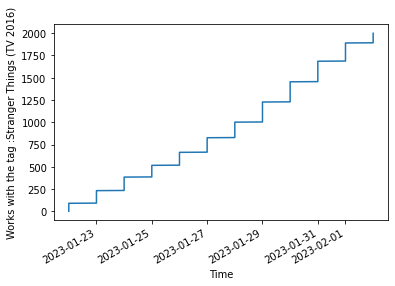

In [44]:
# x and y of course
x = base_graph['Date_publication']
y = base_graph['Index']

# plot
plt.plot(x,y)

ylabel = "Works with the tag :" + tag_2

plt.xlabel("Time")
plt.ylabel(ylabel)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

So the problem here is when there is too much data there's not enought dates so it became an ugly stair and serve no purpose.

*Histogram* :

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae56e39790>]]


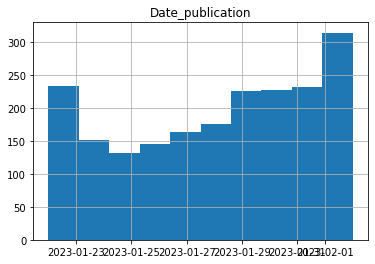

In [45]:
print(base_graph.hist("Date_publication"))

**Find tags in works**

Ok so I try to make a function where you can find a tag in the dataset so you don't have to append every tag independently.

*Parameters*

So I'm just asking you wich tag you want to search and on wich variable.
The tag is just the word or name of the character, all you need is to respect uppercase and space.


In [46]:
tag_search = "Will Byers"

# Just an exemple
# Will fans are so toxic omg
# (True)


And for wich variable you can choose between the requiered tag or the additional tag.

In [47]:
Variable_search_tag = 'Requiered_tags'

Variable_search_tag = 'Additionnal_tags'

# Please look first which tag you want to search INTO the database
# A tag "F/F" won't exist in the Additionnal_tags

In [48]:
base2 = base1
random_page = (random.randint(0,len(base2)))
print(random_page)
base2['Additionnal_tags'][random_page]

# If you want to look at a specific tag

108


'|Creator Chose Not To Use Archive WarningsBilly Hargrove & Maxine "Max" MayfieldBilly Hargrove Maxine "Max" MayfieldDrabble Witness Protection they could\'ve been siblings No Dialogue Not Beta Read|'

So what we doing here is using the *find* function, the output is the placement of the caracter we searching, or at least the beginning.
But, if the caracter or the string of caracter doesn't exist the output is "-1" .
We using it to find the tag in our variable.

In [49]:
def find_tag(full_tag,tag):
  tag_here = full_tag.find(tag)
  if tag_here != -1:
    tag_present = "tag is present"
  else:
    tag_present = "tag isn't present"
  # print(tag_present)
  tag_present_2.append(str(tag_present))

# And we append the tag is present or not and place it in "tag_present_2"

In [50]:
tag_present_2 = []
for i in range(len(base1[Variable_search_tag])):
  find_tag(base1[Variable_search_tag][i],tag_search)

In [51]:
tag_present_3 = "tag_present_" + tag_search

In [52]:
base_tag = base1
base_tag[tag_present_3] = tag_present_2
base_tag

# Please note that it's add to the database
# If you did a first search on a tag and then search for another it will stay on the data base

,Index_page,ID,Date_publication,Title_and_author,Language_of_the_work,Word,Chapter,Hits,Requiered_tags,Additionnal_tags,Month,tag_present_Will Byers
0,1,44157319,2023-02-02,Harringrove Stuff by wrecked_fuse,English,0,60/60,111004,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive Warnings No ...,0 2\n1 2\n2 2\n3 2\n4 ...,tag isn't present
1,1,44733832,2023-02-02,"The Past, The Future and The Present by Sodap...",English,"2,278",1/2,0,"| Explicit| Underage| M/M, Multi| Work in Prog...",|UnderageWill Byers/Mike Wheeler Mike Wheeler/...,0 2\n1 2\n2 2\n3 2\n4 ...,tag is present
2,1,21311245,2023-02-02,Like Magnets by Pondermoniums for wrecked_fuse,English,"25,522",18/?,7588,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyBilly Hargrove/Steve...,0 2\n1 2\n2 2\n3 2\n4 ...,tag isn't present
3,1,44511886,2023-02-02,Be Patient by TATAMONIQUELAGINETTE,English,"2,395",1/1,0,| Explicit| No Archive Warnings Apply| F/F| Co...,|No Archive Warnings ApplyRobin Buckley/Nancy ...,0 2\n1 2\n2 2\n3 2\n4 ...,tag isn't present
4,1,43212331,2023-02-02,Midnight (Belongs to You and Me) by Polkadotd...,English,"24,448",4/?,1254,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsChri...,0 2\n1 2\n2 2\n3 2\n4 ...,tag isn't present
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,100,44318299,2023-01-22,something happens and i'm head over heels by ...,English,"12,694",5/?,1063,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsStev...,0 2\n1 2\n2 2\n3 2\n4 ...,tag is present
1996,100,40882788,2023-01-22,Love of a Lifetime by dibidibidani,English,"19,053",7/?,667,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyChrissy Cunningham/E...,0 2\n1 2\n2 2\n3 2\n4 ...,tag isn't present
1997,100,44463469,2023-01-22,Home by the Sea by WreakingHavok,English,"11,716",4/5,1965,| General Audiences| Choose Not To Use Archive...,|Creator Chose Not To Use Archive WarningsWill...,0 2\n1 2\n2 2\n3 2\n4 ...,tag is present
1998,100,44462842,2023-01-22,Asking You to Love Me by chattrekisses,English,"22,397",1/1,1999,| Explicit| No Archive Warnings Apply| M/M| Co...,|No Archive Warnings ApplySteve Harrington/Edd...,0 2\n1 2\n2 2\n3 2\n4 ...,tag is present


In [53]:
'''
Clean the database from the "Tag is present" variables
'''

drop_col = []
for i in range(11,len(base_tag.columns)):
  drop_col.append(base_tag.columns[i])
base_tag.drop(columns = drop_col)

,Index_page,ID,Date_publication,Title_and_author,Language_of_the_work,Word,Chapter,Hits,Requiered_tags,Additionnal_tags,Month
0,1,44157319,2023-02-02,Harringrove Stuff by wrecked_fuse,English,0,60/60,111004,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive Warnings No ...,0 2\n1 2\n2 2\n3 2\n4 ...
1,1,44733832,2023-02-02,"The Past, The Future and The Present by Sodap...",English,"2,278",1/2,0,"| Explicit| Underage| M/M, Multi| Work in Prog...",|UnderageWill Byers/Mike Wheeler Mike Wheeler/...,0 2\n1 2\n2 2\n3 2\n4 ...
2,1,21311245,2023-02-02,Like Magnets by Pondermoniums for wrecked_fuse,English,"25,522",18/?,7588,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyBilly Hargrove/Steve...,0 2\n1 2\n2 2\n3 2\n4 ...
3,1,44511886,2023-02-02,Be Patient by TATAMONIQUELAGINETTE,English,"2,395",1/1,0,| Explicit| No Archive Warnings Apply| F/F| Co...,|No Archive Warnings ApplyRobin Buckley/Nancy ...,0 2\n1 2\n2 2\n3 2\n4 ...
4,1,43212331,2023-02-02,Midnight (Belongs to You and Me) by Polkadotd...,English,"24,448",4/?,1254,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsChri...,0 2\n1 2\n2 2\n3 2\n4 ...
...,...,...,...,...,...,...,...,...,...,...,...
1995,100,44318299,2023-01-22,something happens and i'm head over heels by ...,English,"12,694",5/?,1063,| Explicit| Choose Not To Use Archive Warnings...,|Creator Chose Not To Use Archive WarningsStev...,0 2\n1 2\n2 2\n3 2\n4 ...
1996,100,40882788,2023-01-22,Love of a Lifetime by dibidibidani,English,"19,053",7/?,667,| Teen And Up Audiences| No Archive Warnings A...,|No Archive Warnings ApplyChrissy Cunningham/E...,0 2\n1 2\n2 2\n3 2\n4 ...
1997,100,44463469,2023-01-22,Home by the Sea by WreakingHavok,English,"11,716",4/5,1965,| General Audiences| Choose Not To Use Archive...,|Creator Chose Not To Use Archive WarningsWill...,0 2\n1 2\n2 2\n3 2\n4 ...
1998,100,44462842,2023-01-22,Asking You to Love Me by chattrekisses,English,"22,397",1/1,1999,| Explicit| No Archive Warnings Apply| M/M| Co...,|No Archive Warnings ApplySteve Harrington/Edd...,0 2\n1 2\n2 2\n3 2\n4 ...


**Download a DataFrame**

Once again I don't know what you want to do but if you want to append a lot of data on big fandom you can't do it in one time.

If you're insane like me you can download a database 50 page by 50 page, I'm posting another code to how create a full database. (part 3)

For exemple, in Stranger Things for today (25/01/2023) the fandom have ~ 63 000 works, around 3126 pages so my insane little brain and I run the code 3126/50 = 62 times then mash up every data.

In [54]:
base_export = base1
Name_base = "base_page_" + str(Beginning_Page) + "_to_" + str(Number_page) + ".csv"
Name_base

'base_page_1_to_101.csv'

In [55]:
"""
base_export.to_csv(Name_base) 
files.download(Name_base)
"""

# Take off the quote if you want to download the base

'\nbase_export.to_csv(Name_base) \nfiles.download(Name_base)\n'

Thanks for reading my little comment hope this code helped you in anyway.